In [40]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
import seaborn as sns
from IPython.display import display, Latex, Markdown
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn import linear_model as lm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Table of Contents

- ### Introduction
    In this presentation, I will walk through the steps for analyzing the sentiment of lines spoken by Walter about Jesse in the show Breaking Bad. The goal is to understand the factors influencing the sentiment of these lines, calculate a linear regression model, and observe changes in sentiment across different seasons. (Season 3 only until Episode 7 included due to tidyness issues)

- ### Step 1: Load the transcripts and extract lines
    We start by loading the transcript files for each season. In my example, I used the first three seasons (S03E07), but you can add more seasons by updating the transcript_files list.

- ### Step 2: Extract lines spoken by Walter about Jesse
    For each seasons transcripts, I use a regular expression pattern to extract lines spoken by Walt. I then filter these lines to keep only those that mention "Jesse".

- ### Step 3: Sentiment analysis using VADER
    I use the VADER sentiment analysis tool to compute sentiment scores for each line mentioning Jesse. VADER returns a compound sentiment score, which we store in a dataframe along with relevant information, such as line length, number of words, and the presence of the word "Jesse".

- ### Step 4: Fitting a basic linear model
    I fit a basic linear regression model to the data to determine factors influencing sentiment. I use line length, number of words, as explanatory variables.

- ### Step 5: Calculating the average sentiment and Rate of Change (ROC) of sentiment for each season

    I calculate the average sentiment and ROC of sentiment from the lines mentioning Jesse for each season and graph them out to see precisely the changes in sentiment from Walt

- ### Outcomes
    By running this code, we can gain insights into the relationship between Walter and Jesse as the story progresses. We can explore how their relationship evolves, identify any significant shifts in sentiment related to key plot points or character developments, and understand the factors influencing sentiment in their interactions.

## Step 1: Load the transcripts and extract lines

We start by loading the transcript files for each season. In my example, I used the first three seasons (S03E07), but you can add more seasons by updating the transcript_files list.

In [41]:
transcript_files = [
    "Breaking Bad Season 1 Transcript.txt",
    "Breaking Bad Season 2 Transcript.txt",
    "Breaking Bad Season 3 Transcript.txt",
    # Add paths for more seasons if needed
]


In [39]:

'''  
This is done in order to filter out the lines where they are talking to each other and having a conversation instead of just Walt directly mentioning Jesse in his script
It works but it creates more problems as it outputs the same lines over and over again creating a massive output and a lot of duplicates. Ive decided to skip on this, but im 
leaving the code here just for reference. Ive also tried with regex patterns but again couldnt find anything that worked.

Example:
Jesse: Hey, Mr. White!
Walt: Jesse, we need to cook.
Walt: It's important.
Jesse: Let's do it then.

Output: ['Jesse, we need to cook.', "It's important."]

'''
#Uncomment to run 
'''
with open("Breaking Bad Season 1 Transcript.txt", "r") as file:
    text = file.read()
walt_convs=[]
# Find conversations between Walt and Jesse
pattern2 = r'(Walter|Walt):\s(.+?)(?=[A-Za-z\s]+\n)'
walt_lines = re.findall(pattern2, text, re.MULTILINE | re.DOTALL)
pattern3 = r'(Jesse):\s(.+?)(?=[A-Za-z\s]+\n)'
jesse_lines = re.findall(pattern3, text, re.MULTILINE | re.DOTALL)

# Merge Jesse and Walt's lines into a single list
all_lines = sorted(walt_lines + jesse_lines, key=lambda x: x[1])

# Create a list of all conversations between Walt and Jesse
conversations = []
for i in range(len(all_lines)):
    if all_lines[i][0] == 'Walter' or all_lines[i][0] == 'Walt':
        for j in range(i+1, len(all_lines)):
            if all_lines[j][0] == 'Jesse':
                conversation = all_lines[i:j+1]
                conversations.append(conversation)
                break

# Print Walt's lines in the conversations
for conv in conversations:
    print("Walt's lines:")
    for line in conv:
        if line[0] == 'Walter' or line[0] == 'Walt':
            #walts_convs = line[1]
            print(line[1])
    print("---------------")
'''

'\nwith open("Breaking Bad Season 1 Transcript.txt", "r") as file:\n    text = file.read()\nwalt_convs=[]\n# Find conversations between Walt and Jesse\npattern2 = r\'(Walter|Walt):\\s(.+?)(?=[A-Za-z\\s]+\n)\'\nwalt_lines = re.findall(pattern2, text, re.MULTILINE | re.DOTALL)\npattern3 = r\'(Jesse):\\s(.+?)(?=[A-Za-z\\s]+\n)\'\njesse_lines = re.findall(pattern3, text, re.MULTILINE | re.DOTALL)\n\n# Merge Jesse and Walt\'s lines into a single list\nall_lines = sorted(walt_lines + jesse_lines, key=lambda x: x[1])\n\n# Create a list of all conversations between Walt and Jesse\nconversations = []\nfor i in range(len(all_lines)):\n    if all_lines[i][0] == \'Walter\' or all_lines[i][0] == \'Walt\':\n        for j in range(i+1, len(all_lines)):\n            if all_lines[j][0] == \'Jesse\':\n                conversation = all_lines[i:j+1]\n                conversations.append(conversation)\n                break\n\n# Print Walt\'s lines in the conversations\nfor conv in conversations:\n    pri

## Steps 2, 3 and 4

For each seasons transcripts, I use a regular expression pattern to extract lines spoken by Walt. I then filter these lines to keep only those that mention "Jesse".

Season 1


,line,sentiment,line_length,num_words
0,"Actually, it's just basic chemistry, but thank...",0.8807,84,13
1,Jesse?,0.0000,6,1
2,Who is this? I was dialing Jesse Pinkman. Well...,0.3527,66,13
3,"Jesse, Jesse, listen to me. Today is the first...",0.0000,76,16


Coefficients: [ 0.03782891 -0.17230019]
Intercept: -0.03349967421886568


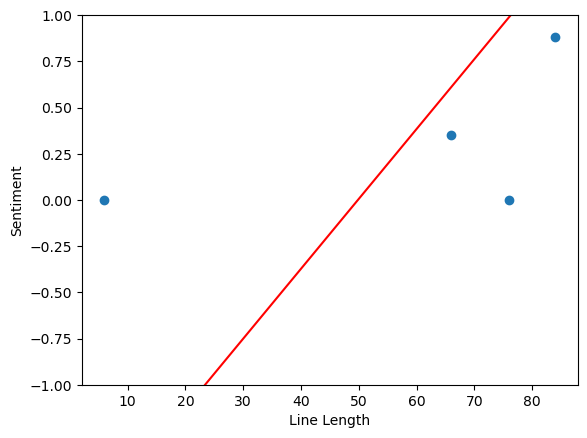

Season 2


,line,sentiment,line_length,num_words
0,"What's changed, Jesse?",0.0000,22,3
1,Jesse.,0.0000,6,1
2,"Look, Jesse, your problems are just that. Your...",-0.7650,130,24
3,"What happens when word gets out, and it's open...",0.0000,163,28
4,Jesse. Open the door. I know you're home. Your...,0.0000,75,15
5,Jesse Jackson? Do you even...I see you have a ...,0.0000,121,22
6,Sure. They won't like it. But I say they're no...,0.0245,153,32
7,"Don't you see how great this is? Look, you are...",0.6249,87,19
8,"A blowfish. Think about it. Small in stature, ...",-0.3693,205,36
9,The blowfish puffs up. The blowfish puffs hims...,-0.7013,370,67


Coefficients: [-0.01935283  0.10367794]
Intercept: -0.17497560887279642


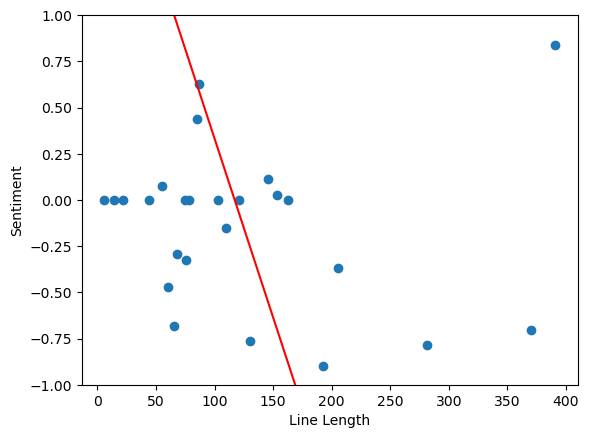

Season 3


,line,sentiment,line_length,num_words
0,"That's excellent. That's very good, Jesse. Boy...",0.7640,256,50
1,"No, no, no. Come on, Jesse.",-0.6808,27,6
2,"You wanna talk about trust, Jesse? Let's talk ...",0.7650,131,26
3,As if I would seriously believe you would hire...,-0.1779,91,16
4,"No. No, no, no. Let me be clear. Let me be per...",0.9271,256,45
5,"Well, I hate to break it to you, Jesse, but ou...",-0.2023,97,21
6,"No, he knows it exists and he's trying to find...",-0.2732,125,27
7,"My brother-in-law, he is surveilling Jesse's h...",0.0000,107,18
8,"This is…Jesse, I'm so sorry for this. This sho...",-0.1880,68,12
9,"Yes, I think what Saul is saying makes a lot o...",0.3612,113,24


Coefficients: [ 0.00357825 -0.00285076]
Intercept: -0.20738048660591613


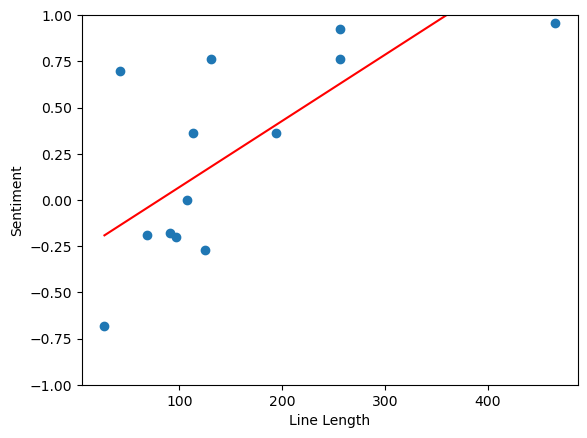

In [42]:
season_sentiments = []
file_count = 0
# Load and read the transcripts
for transcript_file in transcript_files:
    with open(transcript_file, 'r') as file:
        text = file.read()
        file_count += 1
        print("Season {}".format(file_count))
        #print(text)

        # Finds the script of Walt and Jesse
        pattern1 = r'(Walter|Walt):\s(.+?)(?=[A-Za-z\s]+\n)' # Regex pattern for Walts lines
        walt_lines = re.findall(pattern1, text, re.MULTILINE | re.DOTALL)
        pattern2 = r'(Jesse):\s(.+?)(?=[A-Za-z\s]+\n)' # Regex pattern for Jesses lines
        jesse_lines = re.findall(pattern2, text, re.MULTILINE | re.DOTALL)
        

        # Uncomment this to show all the lines from Walt and Jesse
        #display(walt_lines)
        #display(jesse_lines)

        # Filters Walts lines containing the word "Jesse"
        jesse_lines = [line[1] for line in walt_lines if "Jesse" in line[1] or "Jesse Pinkman" in line[1]]

        '''
        ### Step 3: Sentiment analysis using the vader_lexicon
        I use the VADER sentiment analysis tool to compute sentiment scores for each line mentioning Jesse. VADER returns a compound sentiment score, 
        which we store in a dataframe along with relevant information, such as line length, number of words, and the presence of the word "Jesse".
        '''
        # Finds sentiment of each line using VADER
        sia = SentimentIntensityAnalyzer()
        sentiments = [sia.polarity_scores(line)["compound"] for line in jesse_lines]
        
        season_sentiments.append(sentiments)

        word_count = [len(line.split()) for line in jesse_lines]
        #print(word_count)

        # Creates df with relevant information
        data = pd.DataFrame({
        'line': jesse_lines,
        'sentiment': sentiments,
        'line_length': [len(line) for line in jesse_lines],
        'num_words': word_count#,
        #'contains_jesse': [1] * len(jesse_lines)
        })
        display(data)

        '''
        ### Step 4: Fitting a basic linear model

        I fit a basic linear regression model to the data to determine factors influencing sentiment. 
        I use line length, number of words, as explanatory variables.
        '''
        
        # Independent Variables
        X = data[['line_length', 'num_words']]

        # Dependent variable
        y = data['sentiment']

        # Fit the model
        model = lm.LinearRegression().fit(X, y)

        # Print the coefficients
        print('Coefficients:', model.coef_)
        print('Intercept:', model.intercept_)

        line_length_range = np.arange(data['line_length'].min(), data['line_length'].max() + 1).reshape(-1, 1)
        X_new = pd.DataFrame({'line_length': line_length_range.flatten(), 'num_words': np.mean(word_count)})
        sentiment_pred = model.predict(X_new)
        
        plt.scatter(data['line_length'], data['sentiment'])
        plt.plot(line_length_range, sentiment_pred, color='red')
        plt.xlabel('Line Length')
        plt.ylabel('Sentiment')
        plt.ylim(-1, 1)
        plt.show()

### Outcomes from the Model Plots

Based on these plots, it seems like there is a weak positive relationship between line length and sentiment score towards Jesse, as the regression line has a slight positive slope. The plot also indicates that the majority of the sentiment scores fall within a narrow range between -0.5 and 0.5, with only a few outliers showing much more extreme sentiment. The small range of sentiment scores suggests that Walts feelings towards Jesse are somewhat consistent throughout these seasons, but the outliers indicate moments of particularly heightened emotion.

## Step 5: Calculate the average sentiment and Rate of Change (ROC) of sentiment for each season

I calculate the average sentiment and ROC of sentiment from the lines mentioning Jesse for each season and graph them out to see precisely the changes in sentiment from Walt

In [43]:
# Calculates average sentiment for each season
avg_sentiments = [np.mean(sentiments) for sentiments in season_sentiments]

# Compares average sentiment across seasons
for i, avg_sentiment in enumerate(avg_sentiments):
    print(f"Average sentiment score in Season {i + 1}: {avg_sentiment:.2f}")

Average sentiment score in Season 1: 0.31
Average sentiment score in Season 2: -0.13
Average sentiment score in Season 3: 0.25


### Outcomes from the Average Sentiments
Season 1: the average sentiment score for Walt towards Jesse is 0.31, which is a positive sentiment. This suggests that Walt had generally a positive view of Jesse in the early stages of their relationship.

Season 2: the average sentiment score for Walt towards Jesse is -0.13, which is a negative sentiment. This suggests that Walt's sentiment towards Jesse became more negative as their relationship became more strained and complicated.

Season 3: the average sentiment score for Walt towards Jesse is 0.25, which is a slightly positive sentiment. This suggests that although their relationship remained complex, Walt's sentiment towards Jesse may have improved somewhat compared to the previous season.

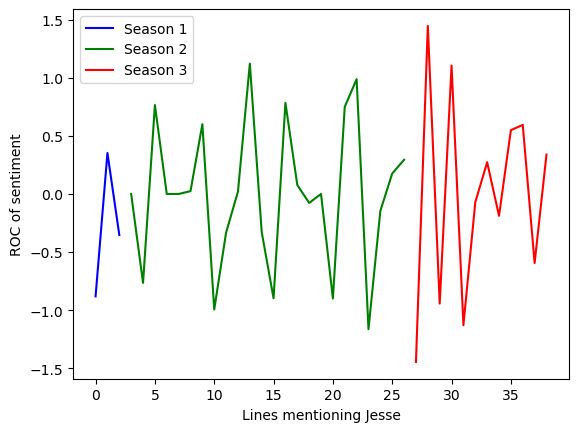

In [44]:
roc_sentiments = []
for sentiments in season_sentiments:
    rate_of_change = [sentiments[i + 1] - sentiments[i] for i in range(len(sentiments) - 1)]
    roc_sentiments.append(rate_of_change)

# Set up the line colors for each season
colors = ['blue', 'green', 'red']  # Add more colors for more seasons if needed

# Plot the rate of change of sentiment for each season
start = 0
for i, (roc, color) in enumerate(zip(roc_sentiments, colors)):
    end = start + len(roc)
    x_values = list(range(start, end))

    plt.plot(x_values, roc, color=color, label=f'Season {i + 1}')
    start = end

plt.xlabel('Lines mentioning Jesse')
plt.ylabel('ROC of sentiment')
plt.legend()
plt.show()

## Conclusion
The plot of the ROC of sentiment shows that sentiment of Walt towards Jesse changes constantly over the course of the of these seasons. In the first season, sentiment towards Jesse is relatively stable, but in the second and third seasons, sentiment from Walt towards Jesse becomes increasingly negative. This suggests that something happens in the second season that causes Walt to have a more negative opinion of Jesse. This could be due to a variety of factors, such as changes in Jesse's character, changes in the way he is portrayed, changes in the overall plot of the show, or Walt is just a manipulative psychopath and nothing can stop him.